## Phase 1 - Exploratory Data Analysis

### 1 : Reading and Observing the Dataset

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the data into the jupyter notebook
ecommerce_data = pd.read_csv("data.csv", encoding = "unicode_escape")
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#Checking the number of rows and columns
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### From the data descfription and informationabove of the numerical columns, It is observed that there are 8 columns and 541909 entries for the year. Also, from the decription, we notice the negative values in both the quantity and unit price column. This is strange beacuse it is impossible for price or quantity to be of negative value.  
##### Hence We remove the negative values

In [5]:
# Removing the negative values
ecommerce_data = ecommerce_data[ecommerce_data["Quantity"] > 0];
ecommerce_data = ecommerce_data[ecommerce_data["UnitPrice"] >= 0];
ecommerce_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


##### Know we see the real data and see that some items cost as much as 13541
##### We notice that the minimum value in quantity column is now one and the minimum value in unitprice column is 0 implying that some items were given out for free.


### 2: Dealing with missing values and outliers

In [7]:
#Checking for missing values in the columns
ecommerce_data.isnull().sum().sort_values(ascending=False)

CustomerID     133359
Description       592
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [8]:
#Since we cannot input any value in the customer code and description, we drop the rows with missing values
ecommerce_data.dropna(axis = 0, how = "any", inplace= True)

In [9]:
ecommerce_data.shape

(397924, 8)

##### Dropping the entries with  missing values reduces our datasets to 397924 entries.

### Adding columns and dealing with date and time

In [10]:
#creating a column for the total Amount Spent on each transaction
ecommerce_data["TotalAmountSpent"] = ecommerce_data["Quantity"] * ecommerce_data["UnitPrice"];

In [11]:
#Parsing the datetime column to pandas Datetime format
ecommerce_data.InvoiceDate = pd.to_datetime(ecommerce_data["InvoiceDate"], dayfirst = False)

In [12]:
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


##### From the above preview, we observe that the Total amount spent column has been created and the InvoiceDate column has been parsed

In [13]:
#Extracting the Year, Month, Day, Hour column from the Invoice Date column
ecommerce_data["Year"] = ecommerce_data["InvoiceDate"].dt.year
ecommerce_data["Month"] = ecommerce_data["InvoiceDate"].dt.month
ecommerce_data["Day"] = ecommerce_data["InvoiceDate"].dt.day_name()
ecommerce_data["Hours"] = ecommerce_data["InvoiceDate"].dt.hour

In [14]:
ecommerce_data['YearMonth'] = 100*ecommerce_data["Year"] + ecommerce_data["Month"]

In [15]:
##From the date transformation, we see that no data was recorded for saturday.
ecommerce_data["Day"].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

# Phase 2: Exploratory Data Analysis

In [21]:
#Top Selling Products
Top_products = pd.DataFrame(ecommerce_data.groupby(['Description'])["Quantity"].sum().sort_values(ascending = False))
Top_products.head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725


In [20]:
#Top Customers by number of Items ordered
Top_customers_by_order = pd.DataFrame(ecommerce_data.groupby(["CustomerID", "Country"])["Quantity"].sum().sort_values(ascending = False))
Top_customers_by_order.head()

,,Quantity
CustomerID,Country,
14646.0,Netherlands,197491
16446.0,United Kingdom,80997
14911.0,EIRE,80515
12415.0,Australia,77670
12346.0,United Kingdom,74215


In [22]:
#Top Customers by number of orders
Top_customers_by_order2 = pd.DataFrame(ecommerce_data.groupby(["CustomerID", "Country"])["InvoiceNo"].count().sort_values(ascending = False))
Top_customers_by_order2.head()

,,InvoiceNo
CustomerID,Country,
17841.0,United Kingdom,7847
14911.0,EIRE,5677
14096.0,United Kingdom,5111
12748.0,United Kingdom,4596
14606.0,United Kingdom,2700


In [23]:
#Top Customers by total amount spent
Top_customers_by_AmountSpent = pd.DataFrame(ecommerce_data.groupby(["CustomerID", "Country"])["TotalAmountSpent"].sum().sort_values(ascending = False))
Top_customers_by_AmountSpent.head()

,,TotalAmountSpent
CustomerID,Country,
14646.0,Netherlands,280206.02
18102.0,United Kingdom,259657.30
17450.0,United Kingdom,194550.79
16446.0,United Kingdom,168472.50
14911.0,EIRE,143825.06


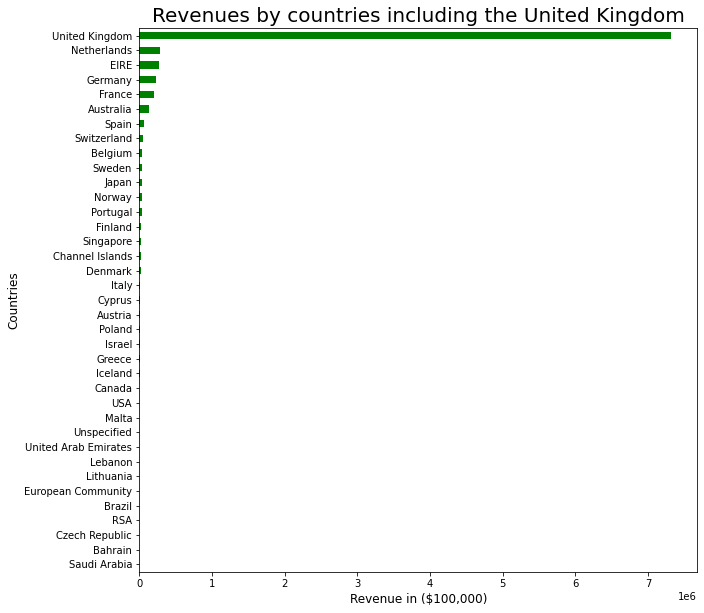

In [57]:
#Visualising  Revenue by Country
revenue_by_country = ecommerce_data.groupby(['Country'])["TotalAmountSpent"].sum().sort_values()

ax = revenue_by_country.plot(kind = 'barh', fontsize = 10, color = 'green', figsize = (10,10));
ax.set_title("Revenues by countries including the United Kingdom", fontsize = 20);
ax.set_xlabel("Revenue in ($100,000)", fontsize = 12);
ax.set_ylabel("Countries", fontsize=12);

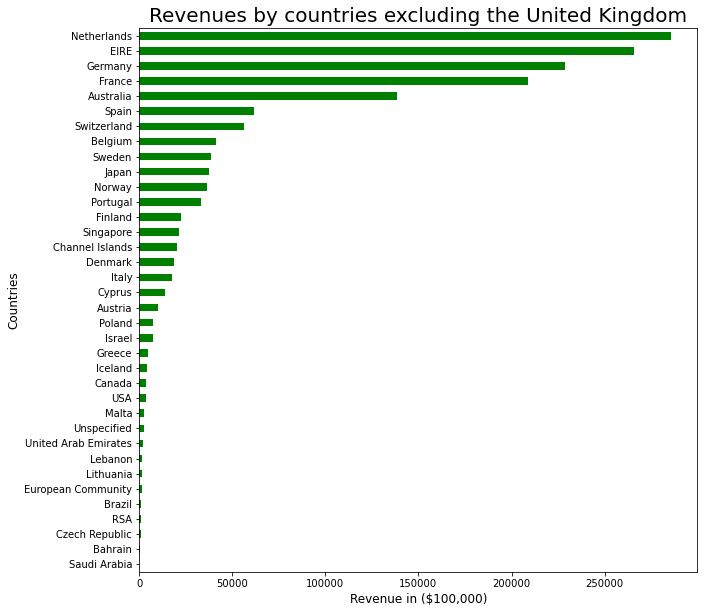

In [93]:
#Without Uk
ax = revenue_by_country.drop(labels = "United Kingdom", inplace = False).plot(kind = 'barh', fontsize = 10, color = 'green', figsize = (10,10));
ax.set_title("Revenues by countries excluding the United Kingdom", fontsize = 20);
ax.set_xlabel("Revenue in ($100,000)", fontsize = 12);
ax.set_ylabel("Countries", fontsize=12);

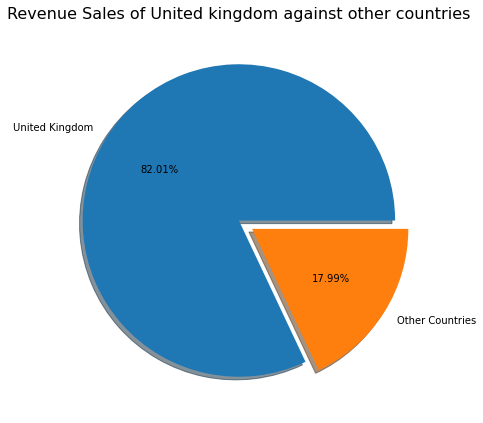

In [87]:
fig, ax = plt.subplots(figsize = (7,8))

ax.pie([revenue_by_country["United Kingdom"], revenue_by_country.drop(labels = "United Kingdom").sum()],
       labels = ["United Kingdom", "Other Countries"],autopct='%1.2f%%', shadow = True, explode = (0,0.1));
ax.set_title("Revenue Sales of United kingdom against other countries", fontsize = 16);

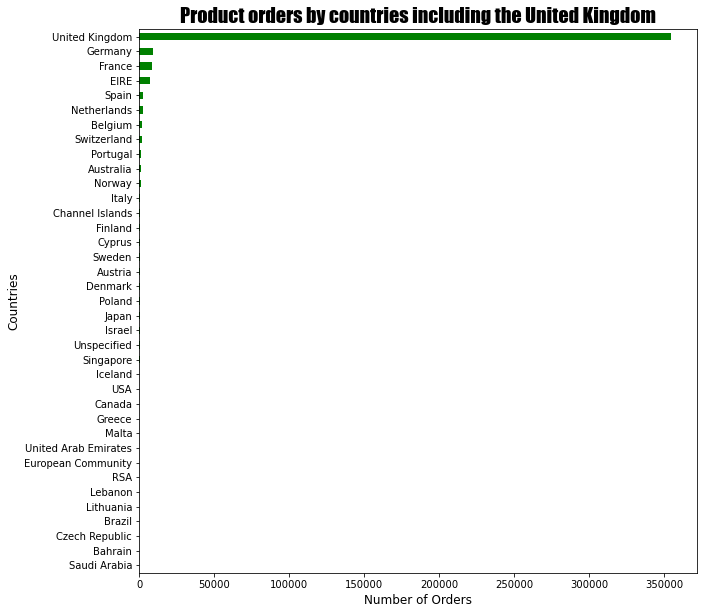

In [90]:
#Visualising Orders by Country
order_by_country = ecommerce_data.groupby(['Country'])["InvoiceNo"].count().sort_values()

ax = order_by_country.plot(kind = 'barh', fontsize = 10, color = 'green', figsize = (10,10));
ax.set_title("Product orders by countries including the United Kingdom", fontsize = 20, fontfamily = "fantasy");
ax.set_xlabel("Number of Orders", fontsize = 12);
ax.set_ylabel("Countries", fontsize=12);

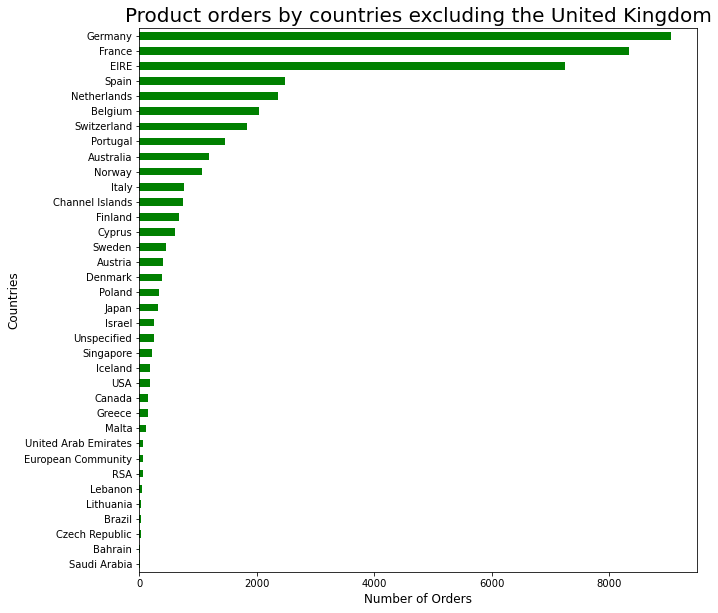

In [92]:
#Without Uk
ax = order_by_country.drop(labels = "United Kingdom", inplace = False).plot(kind = 'barh', fontsize = 10, color = 'green', figsize = (10,10));
ax.set_title("Product orders by countries excluding the United Kingdom", fontsize = 20);
ax.set_xlabel("Number of Orders", fontsize = 12);
ax.set_ylabel("Countries", fontsize=12);

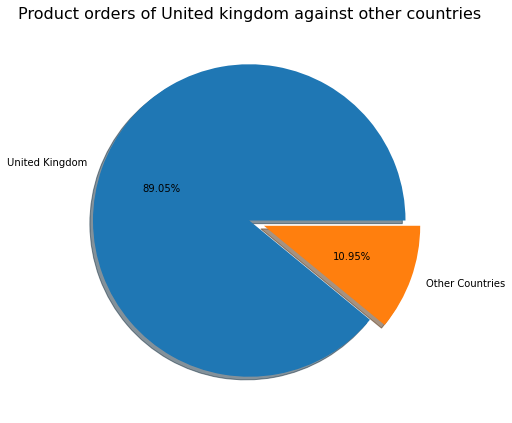

In [94]:
order_without_uk = order_by_country.copy()
del order_without_uk['United Kingdom']

fig, ax = plt.subplots(figsize = (7,8))

ax.pie([order_by_country["United Kingdom"], order_by_country.drop(labels = "United Kingdom", inplace = False).sum()],
       labels = ["United Kingdom", "Other Countries"],autopct='%1.2f%%', shadow = True, explode = (0,0.1));
ax.set_title("Product orders of United kingdom against other countries", fontsize = 16);

In [65]:
order_by_Month = ecommerce_data.groupby(['YearMonth'])["InvoiceNo"].count().sort_index()
order_by_Month

YearMonth
201012    26160
201101    21232
201102    19928
201103    27177
201104    22644
201105    28322
201106    27185
201107    26827
201108    27013
201109    40030
201110    49557
201111    64545
201112    17304
Name: InvoiceNo, dtype: int64

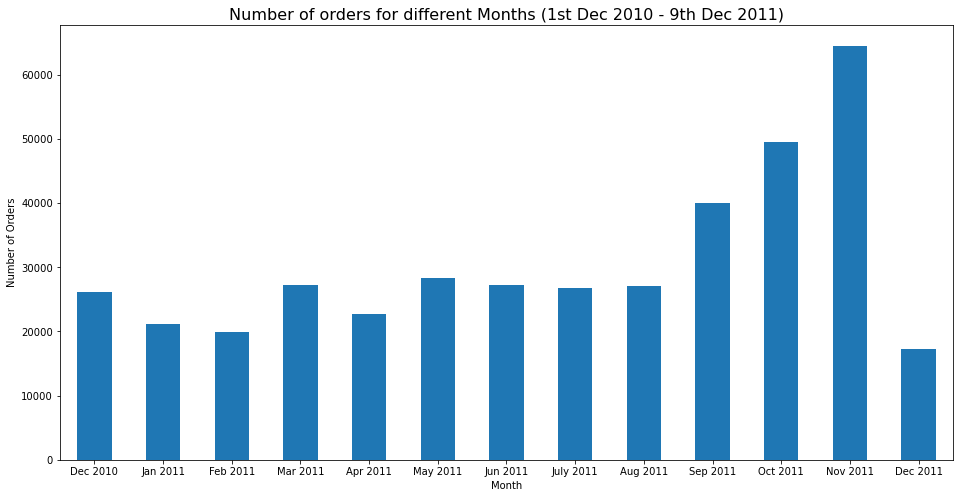

In [67]:
ax = order_by_Month.plot(kind = 'bar', figsize = (16,8))
ax.set_xlabel('Month');
ax.set_ylabel('Number of Orders');
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)', fontsize = 16);
ax.set_xticklabels(('Dec 2010','Jan 2011','Feb 2011','Mar 2011','Apr 2011','May 2011','Jun 2011',
                    'July 2011','Aug 2011','Sep 2011','Oct 2011','Nov 2011','Dec 2011'), rotation='horizontal');

In [ ]:
ecommerce_data.Hours.unique()

In [70]:
order_by_Hour = ecommerce_data.groupby(['Hours'])["InvoiceNo"].count().sort_index()
order_by_Hour

Hours
6         1
7       379
8      8691
9     21945
10    37999
11    49092
12    72069
13    64031
14    54127
15    45372
16    24093
17    13072
18     2929
19     3322
20      802
Name: InvoiceNo, dtype: int64

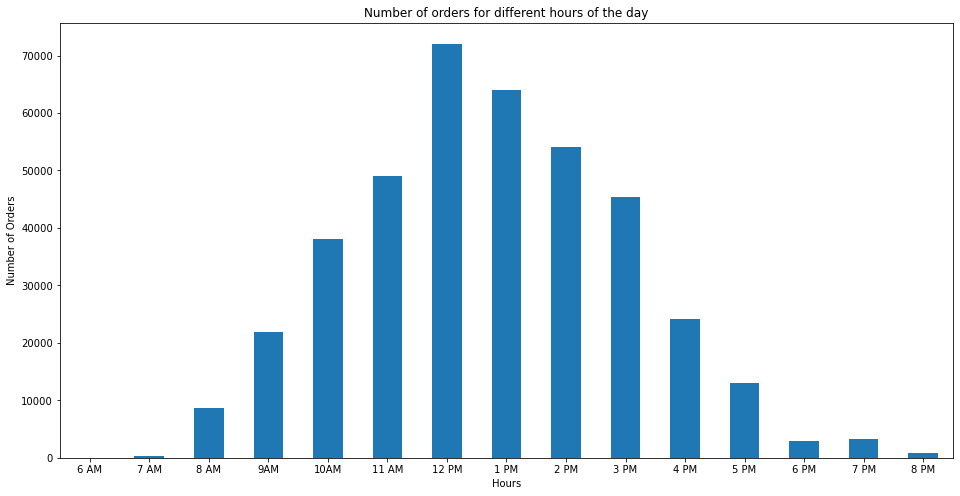

In [74]:
ax1 = order_by_Hour.plot(kind = 'bar', figsize = (16,8))
ax1.set_xlabel('Hours');
ax1.set_ylabel('Number of Orders');
ax1.set_title('Number of orders for different hours of the day');
ax1.set_xticklabels(('6 AM','7 AM','8 AM','9AM','10AM','11 AM','12 PM',
                    '1 PM','2 PM','3 PM','4 PM','5 PM','6 PM', '7 PM', '8 PM'), rotation='horizontal');

In [72]:
order_by_Day = ecommerce_data.groupby(['Day'])["InvoiceNo"].count().sort_index()
order_by_Day.reindex(["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Sunday"])

Day
Monday       64899
Tuesday      66476
Wednesday    68888
Thursday     80052
Friday       54834
Sunday       62775
Name: InvoiceNo, dtype: int64

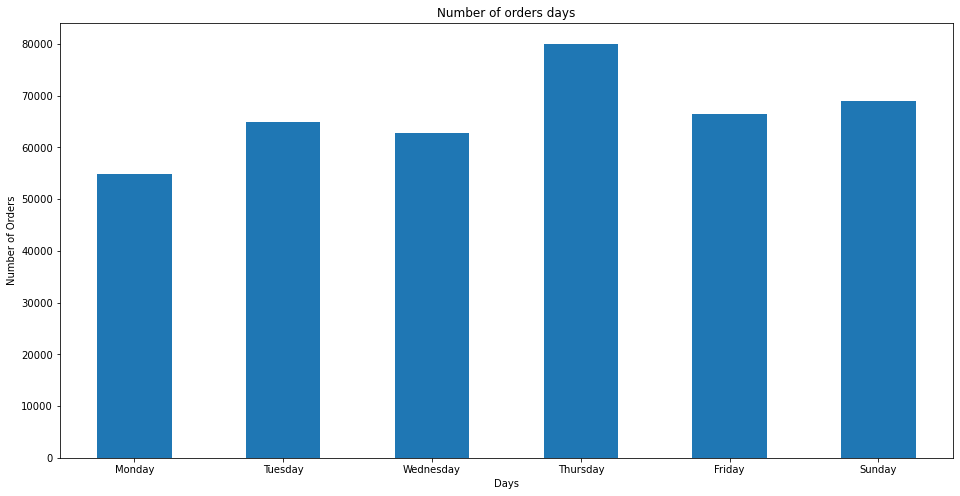

In [73]:
ax1 = order_by_Day.plot(kind = 'bar', figsize = (16,8))
ax1.set_xlabel('Days');
ax1.set_ylabel('Number of Orders');
ax1.set_title('Number of orders days');
ax1.set_xticklabels(("Monday", "Tuesday","Wednesday", "Thursday", "Friday","Sunday"), rotation='horizontal');